In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.api._v2.keras.models import Sequential
from keras.api._v2.keras.layers import Flatten, Dense
from keras.api._v2.keras.optimizers import SGD


In [47]:
df = pd.read_csv('C:/Users/user/Desktop/my_ws/edu/machinelearning/files/ozone.csv')
train_df = df[['Temp','Ozone']]
train_df = train_df.dropna(how='any')
train_df

,Temp,Ozone
0,67,41.0
1,72,36.0
2,74,12.0
3,62,18.0
5,66,28.0
...,...,...
147,63,14.0
148,70,30.0
150,75,14.0
151,76,18.0


In [70]:
def numerical_derivative(f,x):
    # f : 미분하려는 다변수 함수
    # x : 모든 변수를 포함하는 ndarray

    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # shape을 똑같이 0으로 채움

    it = np.nditer(x,flags = ['multi_index'])

    while not it.finished: # iterator가 끝나지 않을 때까지만 반복 , 즉, 끝나면 반복종료
        idx = it.multi_index # 현재의 index를 추출 => tuple 형태로 리턴
        tmp = x[idx] 
        x[idx] = tmp + delta_x
        fx_plus_delta_x = f(x) # f(x + delta_x)

        x[idx] = tmp - delta_x
        fx_minus_delta_x = f(x) # f(x - delta_x)

        derivative_x[idx] = (fx_plus_delta_x - fx_minus_delta_x) / (2 * delta_x)

        x[idx] = tmp

        it.iternext()
    
    return derivative_x

x_data = train_df['Temp'].values.reshape(-1,1)
t_data = train_df['Ozone'].values.reshape(-1,1)

W = np.random.rand(1,1)
b = np.random.rand(1)

def loss_func(input_data):
    input_W = input_data[0]
    input_b = input_data[1]
# y = XW + b
#dot >> 행렬 곱
    y = np.dot(x_data,input_W) + input_b
#mean 평균 power n승 (제곱)
    return np.mean(np.power((t_data-y),2))

def predict(x):
    return np.dot(x,W) + b

learning_rate = 1e-4

for step in range(300000):
    input_param = np.concatenate((W.ravel() , b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param)
    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')
        print(input_param)


W : [[0.68727907]], b : [0.67459002], loss : 2744.662862937882
[0.00779329 0.66641882]
W : [[0.71551997]], b : [-11.62663635], loss : 818.3210262765197
[  0.715515   -11.62624393]
W : [[0.85821457]], b : [-22.90178975], loss : 775.9109841214012
[  0.85821002 -22.90143001]


KeyboardInterrupt: 

In [69]:
predict(np.array([[62]]))
plt.scatter(x_data,t_data)
plt.plot(x_data,W.ravel()*x_data+b,color = 'red')
plt.show()

array([[12.59346859]])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,activation='linear')

model.add(output_layer)
model.compile(optimizer = SGD(learning_rate=1e-4),loss='mse')

model.fit(x_data,t_data,epochs=10000,verbose=0)

In [ ]:
model.predict(np.array([[62]]))
weights, bias = output_layer.get_weights()


1/1 [==============================] - 0s 35ms/step


array([[22.50318]], dtype=float32)

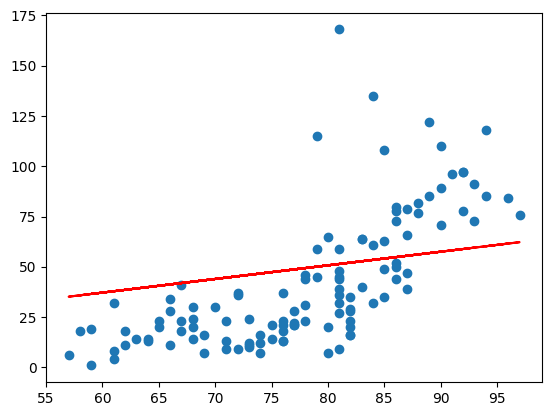

In [ ]:
plt.scatter(x_data,t_data)
plt.plot(x_data,weights*x_data+bias,color = 'red')
plt.show()

In [ ]:
from sklearn import linear_model

sklearn_model = linear_model.LinearRegression()

sklearn_model.fit(x_data,t_data)

print(sklearn_model.predict(np.array([[62]])))

[[3.58411393]]


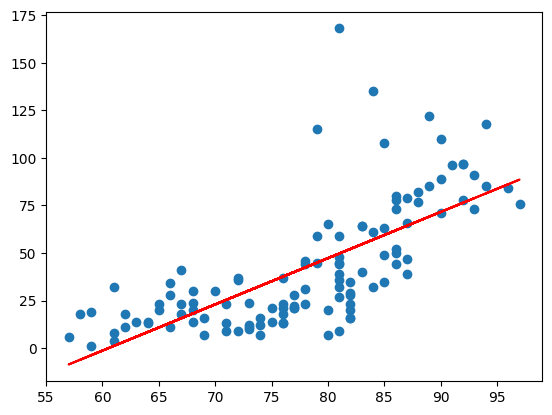

In [ ]:
weights = sklearn_model.coef_ #sklearn 모델 가중치 구하기
bias = sklearn_model.intercept_ # sklearn 모델 바이어스 구하기

plt.scatter(x_data,t_data)
plt.plot(x_data,weights*x_data+bias,color = 'red')
plt.show()

8.0
4.5
11.5
7.0
22.0
-6.0


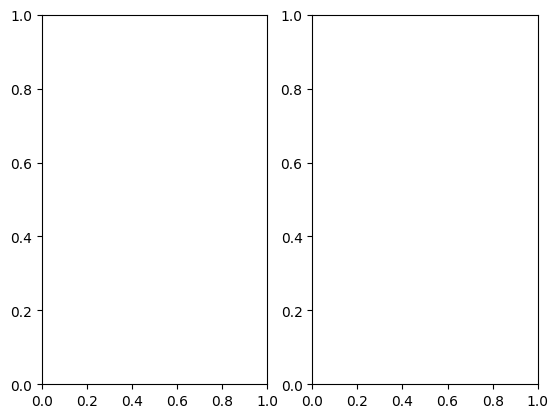

In [49]:
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

print(np.median(data))
print(np.percentile(data,25))
print(np.percentile(data,75))

iqr_value = np.percentile(data, 75) - np.percentile(data,25)
print(iqr_value)

upper_fence = np.percentile(data,75) + 1.5*iqr_value
print(upper_fence)
lower_fence = np.percentile(data,25) - 1.5 * iqr_value
print(lower_fence)

In [55]:
#boolean indexing
result_data = data[(data <= upper_fence) | (data >= lower_fence)]

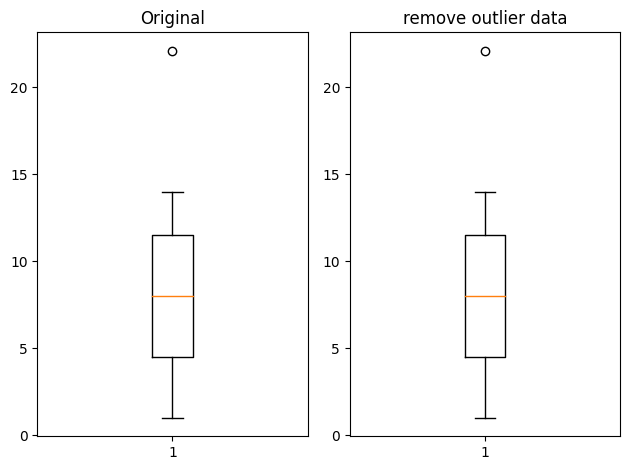

[ 1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
 22.1]


In [56]:
fig = plt.figure()

fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)
fig1.set_title('Original')
fig1.boxplot(data)

fig2.set_title('remove outlier data')
fig2.boxplot(result_data)
plt.tight_layout()
plt.show()
print(result_data)

In [59]:
#데이터를 정규분포화 시킴
from scipy import stats
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,22.1])

zscore_threshold = 2.0

outlier = data[np.abs(stats.zscore(data))>zscore_threshold]

print(stats.zscore(data) > zscore_threshold)
print(stats.zscore(data))
print(data[np.isin(data,outlier,invert=True)])

[False False False False False False False False False False False False
 False False  True]
[-1.40160702 -1.21405925 -1.02651147 -0.8389637  -0.65141593 -0.46386816
 -0.27632038 -0.08877261  0.09877516  0.28632293  0.4738707   0.66141848
  0.84896625  1.03651402  2.55565098]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [75]:

iqr = np.percentile(train_df['Ozone'],75) - np.percentile(train_df['Ozone'],25)

upper = np.percentile(train_df['Ozone'],75) + 1.5 * iqr
lower = np.percentile(train_df['Ozone'],25) - 1.5 * iqr

result_df = train_df[(train_df['Ozone'] <= upper) | (train_df['Ozone'] >= lower)]
x_data = result_df['Temp'].values.reshape(-1,1)
t_data = result_df['Ozone'].values.reshape(-1,1)


In [76]:
for step in range(300000):
    input_param = np.concatenate((W.ravel() , b.ravel()),axis=0)
    derivative_result = learning_rate * numerical_derivative(loss_func,input_param)
    W = W - derivative_result[0].reshape(-1,1)
    b = b - derivative_result[1]

    if step % 30000 == 0:
        print(f'W : {W}, b : {b}, loss : {loss_func(input_param)}')
        print(input_param)

W : [[1.79601659]], b : [-97.00313207], loss : 588.9023642578999
[  1.79601475 -97.00298715]
W : [[1.84871438]], b : [-101.1670996], loss : 583.1182288056988
[   1.8487127  -101.16696675]
W : [[1.89702286]], b : [-104.98424162], loss : 578.257510845335
[   1.89702132 -104.98411983]
W : [[1.94130763]], b : [-108.48344594], loss : 574.1727899245406
[   1.94130622 -108.48333429]
W : [[1.98190383]], b : [-111.69119425], loss : 570.7401807633472
[   1.98190254 -111.69109191]
W : [[2.01911869]], b : [-114.63176254], loss : 567.8555759440721
[   2.0191175  -114.63166872]
W : [[2.05323384]], b : [-117.32740478], loss : 565.4314884431092
[   2.05323276 -117.32731878]
W : [[2.08450748]], b : [-119.79852137], loss : 563.3943982416789
[   2.08450648 -119.79844253]
W : [[2.11317626]], b : [-122.06381352], loss : 561.6825225411737
[   2.11317535 -122.06374125]
W : [[2.13945717]], b : [-124.14042478], loss : 560.2439419560258
[   2.13945633 -124.14035853]


In [74]:
predict(np.array([[62]]))

array([[14.34992764]])

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(1,)))

output_layer = Dense(units=1,activation='linear')

model.add(output_layer)
model.compile(optimizer = SGD(learning_rate=1e-4),loss='mse')

model.fit(x_data,t_data,epochs=10000,verbose=0)

model.predict(np.array([[62]]))
